In [1]:
import ctypes
from array import array
from math import sin, sqrt

import numpy as np

from ROOT import (
    TCanvas,
    TGraph,
    TGraph2D,
    TGraphBentErrors,
    TRandom,
    gStyle,
    kBird,
    kRed,
)

%jsroot off

Welcome to JupyROOT 6.28/04


# TGraph
TGraph 是由两个数组 X 和 Y 组成的对象，每个数组都有 n 个点。
TGraph 的Title需要使用`SetTitle`函数进行设置，与`histogram` 或者 `tree` (（甚至 `TGraph2D`）不同。

In [2]:
c1 = TCanvas("c1", "c1", 500, 500)

n = 20
# python array 写法
x = array("d")
y = array("d")
for i in range(n):
    x.append(i * 0.1)
    y.append(10 * sin(x[i] + 0.2))

# numpy写法
# x = np.array([],dtype=np.float64)
# y = np.array([],dtype=np.float64)
# for i in range(n):
#     x = np.append(x, i * 0.1)
#     y = np.append(y, 10 * sin(x[i] + 0.2))


g1 = TGraph(n, x, y)
g1.SetTitle("Graph title;X title;Ytitle")  # 设置Title，用 ; 隔开

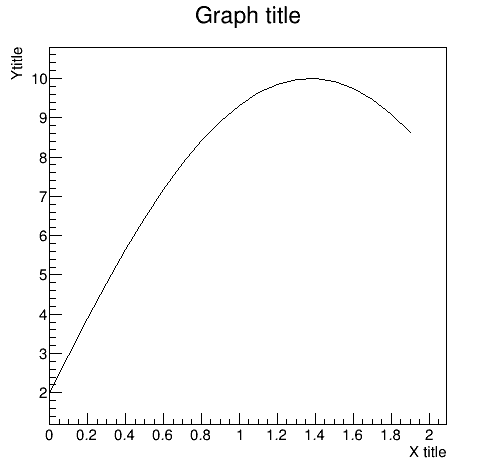

In [3]:
g1.Draw()
c1.Draw()

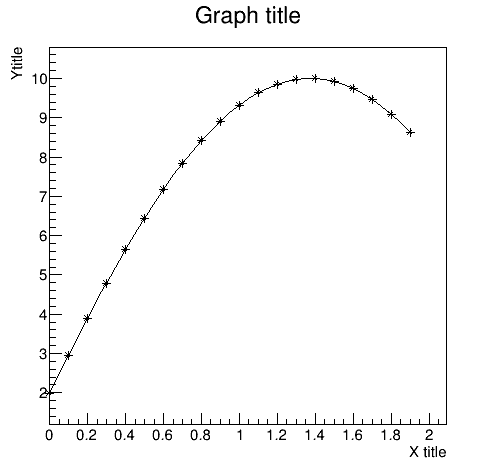

In [4]:
g1.Draw("AC*")
c1.Draw()

## SetPoint

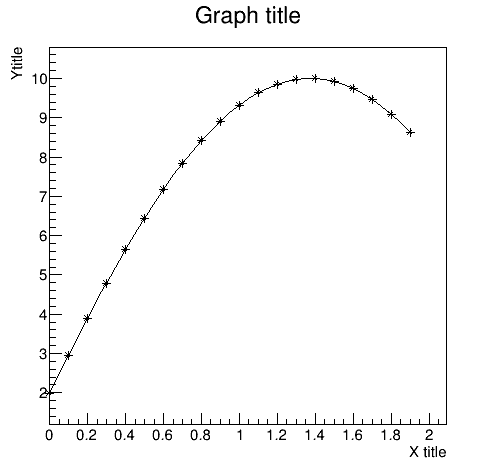

In [5]:
c11 = TCanvas("c11", "c11", 500, 500)
g11 = TGraph()
g11.SetTitle("Graph title;X title;Ytitle")  # 设置Title，用 ; 隔开
n = 20

for i in range(n):
    x = i * 0.1
    y = 10 * sin(x + 0.2)
    g11.SetPoint(i, x, y)
g11.Draw("AC*")
c11.Draw()

## 没有指定 x 轴上的点，将获得默认值 0、1、2、3（等等，取决于 y 点的长度）

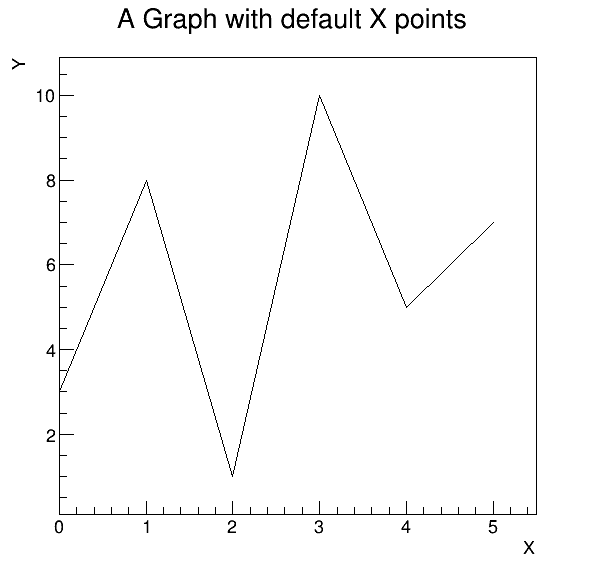

In [6]:
y = array("d", [3, 8, 1, 10, 5, 7])
c2 = TCanvas("c2", "c2", 600, 600)
g2 = TGraph(len(y), y)
g2.SetTitle("A Graph with default X points;X;Y")
g2.Draw()
c2.Draw()

# TGraph2D
TGraph2D的写法同上
图形对象由三个数组 X、Y 和 Z 组成，每个数组具有相同的点数。

In [7]:
c3 = TCanvas("c3", "c3", 600, 600)
x, y, z, P = 6.0, 6.0, 6.0, 6.0
np = 200
g3 = TGraph2D()
g3.SetTitle("Graph title; X axis title; Y axis title; Z axis title")
r = TRandom()
for N in range(np):
    x = 2 * P * (r.Rndm(N)) - P
    y = 2 * P * (r.Rndm(N)) - P
    z = (sin(x) / x) * (sin(y) / y) + 0.2
    g3.SetPoint(N, x, y, z)  # N指序号
# gStyle.SetPalette(1)
%jsroot off

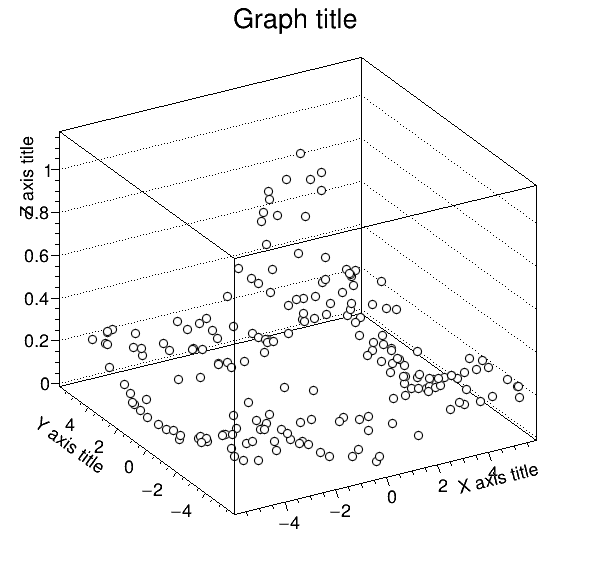

In [8]:
g3.Draw()
c3.Draw()

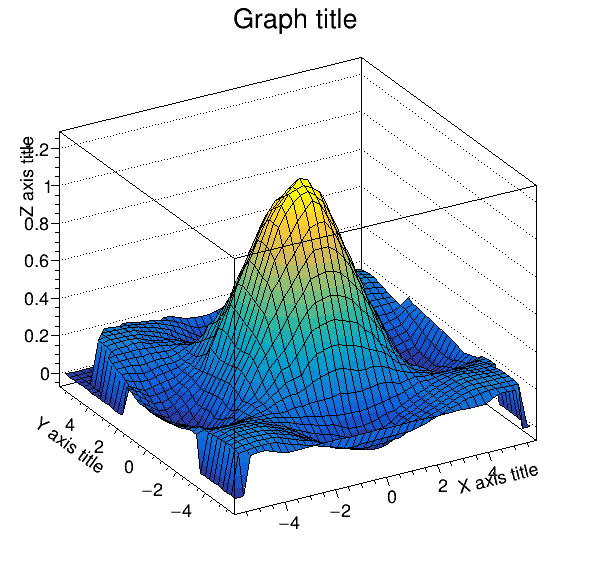

In [9]:
g3.Draw("surf1")
c3.Draw()

In [10]:
%jsroot off

In [11]:
c4 = TCanvas("c4", "c4", 0, 0, 600, 400)
P = 5.0
npx, npy = 20, 20
x, y = -P, -P
k = 0
dx = (2 * P) / npx
dy = (2 * P) / npy
g4 = TGraph2D()
g4.SetTitle("3D;X;Y;Z")

# SetNpx和SetNpy是用于设置在x轴和y轴上绘制图形的网格点数的方法。
# 这些方法可以用来控制绘制的图形的分辨率，即在x和y轴上的数据点的数量。
g4.SetNpx(41)
g4.SetNpy(40)
for i in range(npx):
    for j in range(npy):
        z = sin(sqrt(x * x + y * y)) + 1
        g4.SetPoint(k, x, y, z)
        k += 1
        y = y + dy
    x = x + dx
    y = -P
gStyle.SetPalette(1)
g4.SetMarkerStyle(20)

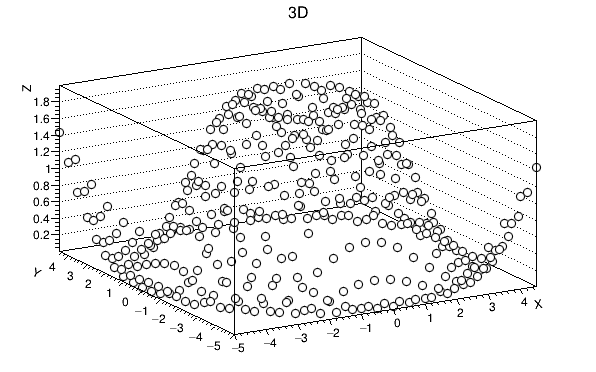

In [12]:
g4.Draw()
c4.Draw()

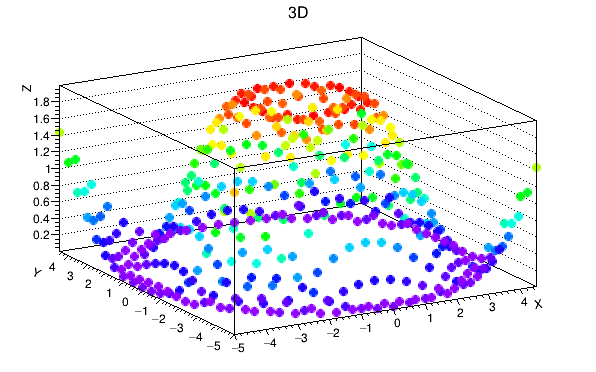

In [13]:
g4.Draw("pcol")
c4.Draw()

# TGraphErrors

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


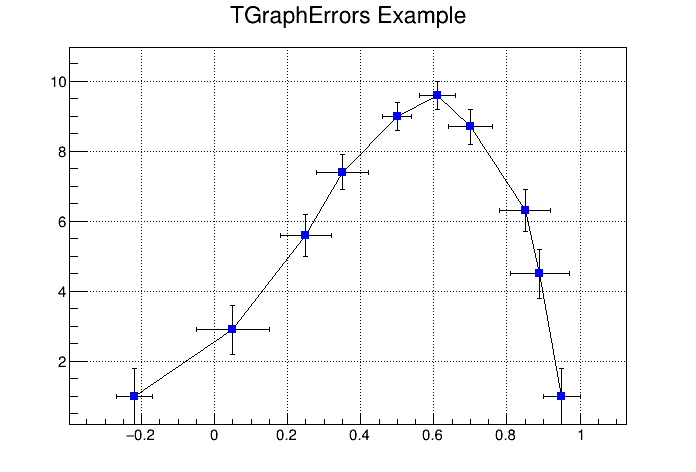

In [14]:
from array import array

from ROOT import TCanvas, TGraphErrors, gROOT

c1 = TCanvas("c1", "A Simple Graph with error bars", 200, 10, 700, 500)

c1.SetGrid()
c1.GetFrame().SetFillColor(21)
c1.GetFrame().SetBorderSize(12)

n = 10
x = array("f", [-0.22, 0.05, 0.25, 0.35, 0.5, 0.61, 0.7, 0.85, 0.89, 0.95])
ex = array("f", [0.05, 0.1, 0.07, 0.07, 0.04, 0.05, 0.06, 0.07, 0.08, 0.05])
y = array("f", [1, 2.9, 5.6, 7.4, 9.0, 9.6, 8.7, 6.3, 4.5, 1])
ey = array("f", [0.8, 0.7, 0.6, 0.5, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8])

gr = TGraphErrors(n, x, y, ex, ey)
gr.SetTitle("TGraphErrors Example")
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
gr.Draw("ALP")

c1.Update()
c1.Draw()

# TScatter

python暂不支持

In [15]:
# c5 = TCanvas("c5", "c5", 600, 400)
# gStyle.SetPalette(kBird,0,0.6)
# n = 100
# x = array("d")
# y = array("d")
# c = array("d")
# s = array("d")
# r = TRandom()
# for i in range(n):
#     x.append(100*r.Rndm(i))
#     y.append(200*r.Rndm(i))
#     c.append(300*r.Rndm(i))
#     s.append(400*r.Rndm(i))
# scatter = TScatter(n,x,y,c,s)
# scatter.SetMarkerStyle(20)
# scatter.SetMarkerColor(kRed)
# scatter.SetTitle("Scatter plot;X;Y")
# scatter.Draw("A")
# c5.Draw()